In [20]:
%reload_ext mocodo

In [21]:
from pathlib import Path
import os
import re

def boxed_text(lines):
    width = len(max(lines, key=len))
    lines[0] = " " * max(0, (width - len(lines[0])) // 2) + lines[0].upper()
    lines[0:0] = [""]
    lines[2:2] = [""]
    lines.append("")
    result = []
    result.append("%" * (width + 6))
    for line in lines:
        spaces = " " * (width - len(line))
        result.append("%  " + line + spaces + "  %")
    result.append("%" * (width + 6))
    result.append("")
    return "\n".join(result)


os.system("rm tutorial_box/*.mcd")
path = Path("tutorial.ipynb")
doc = json.loads(path.read_text())
cells = []
i = 0
titles = ['"Sélectionnez un exemple de MCD"']
for cell in doc["cells"]:
    if cell["cell_type"] == "code":
        source = cell["source"]
        if source and source[0].startswith("%%mocodo"):
            i += 1
            title = source[1][1:].strip()
            titles.append(f'"{title}"')
            lines = []
            for (j, line) in enumerate(source[1:]):
                if not line.startswith("%"):
                    text = boxed_text(lines) + "".join(source[j+1:])
                    break
                lines.append(line[2:-1])
            Path(f"tutorial_box/tuto-{i:04d}.mcd").write_text(text)
            Path(f"../web/box/tuto-{i:04d}.mcd").write_text(text)
print(f"Updated {i} files in tutorial_box folder.")
js_path = Path("../web/mocodo.js")
code = js_path.read_text()
(code, n) = re.subn(r'(?<=createOptions\("tutorial", )\[.+?\]', f"[{', '.join(titles)}]", code)
if n == 0:
    print("Warning: unable to update mocodo.js!")
else:
    js_path.write_text(code)
    print("Updated mocodo.js.")
os.system("open tutorial_box");

Updated 23 files in tutorial_box folder.
Updated mocodo.js.


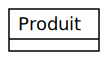

In [22]:
%%mocodo
% Entité
% Pour créer une entité E, écrivez sur une ligne « E: ».

Produit:

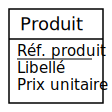

In [23]:
%%mocodo
% Attributs d'entité
% Si E a des attributs, écrivez « E: attr_1, attr_2, ... ».

Produit: Réf. produit, Libellé, Prix unitaire

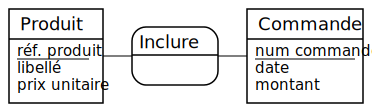

In [24]:
%%mocodo
% Association
% Pour une association A entre plusieurs entités E1, E2, ..., écrivez sur une
% ligne « A, XX E1, XX E2, ... ».

Produit: réf. produit, libellé, prix unitaire
Inclure, XX Commande, XX Produit
Commande: num commande, date, montant

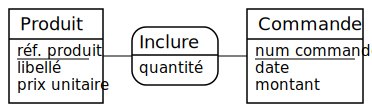

In [25]:
%%mocodo
% Attributs d'association
% Pour ajouter des attributs à une association, mettez un deux-points au
% bout de la ligne, puis énumérez ces attributs séparés par des virgules.

Produit: réf. produit, libellé, prix unitaire
Inclure, XX Commande, XX Produit: quantité
Commande: num commande, date, montant

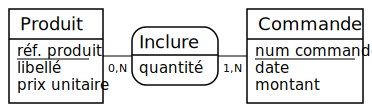

In [26]:
%%mocodo
% Cardinalités
% Si vous connaissez le couple de cardinalités d'une patte, mettez 01, 11, 0N
% ou 1N à la place du XX de l'entité distinguée par cette patte.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

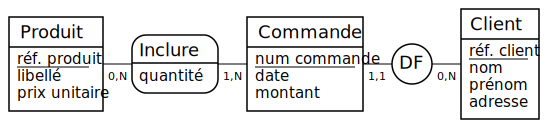

In [27]:
%%mocodo
% Association de dépendance fonctionnelle
% Si votre association a une cardinalité 11, mais aucun attribut, vous pouvez
% la nommer « DF » : Mocodo la figurera dans un cercle.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse

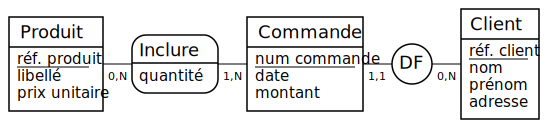

In [28]:
%%mocodo
% Explication interactive des cardinalités
% Le survol d'une cardinalité suivie d'un texte entre crochets fait apparaître
% celui-ci dans un bandeau.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N [Une commande inclut au moins un produit.] Commande, 0N [Un produit peut être commandé un nombre quelconque de fois.] Produit: quantité
Commande: num commande, date, montant
DF, 0N [Un client peut passer zéro (prospect) ou plusieurs commandes.] Client, 11 [Une commande est passée par un et un seul client.] Commande
Client: réf. client, nom, prénom, adresse

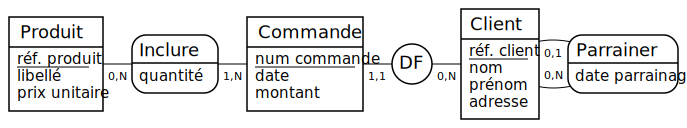

In [29]:
%%mocodo
% Association réflexive
% En répétant le nom d'une entité dans la définition d'une association, vous
% rendez celle-ci réflexive.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

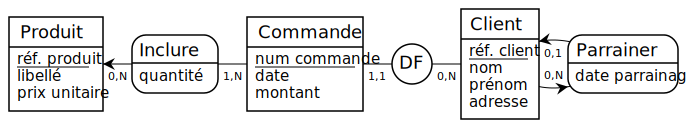

In [30]:
%%mocodo
% Flèches sur les pattes
% En suffixant d'un < ou > des cardinalités, vous créez une flèche dont la
% direction se lit en partant de l'association et en allant vers l'entité.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N> Produit: quantité
Commande: num commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01> Client, 0N< Client : date parrainage

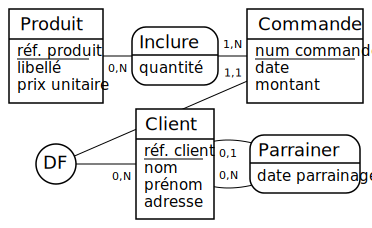

In [31]:
%%mocodo
% Schéma sur plusieurs rangées
% Les boîtes (entités et association) définies sur des lignes consécutives
% sont alignées horizontalement sur la même rangée d'une grille invisible.
% Pour créer une nouvelle rangée, sautez une ligne entre deux définitions.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

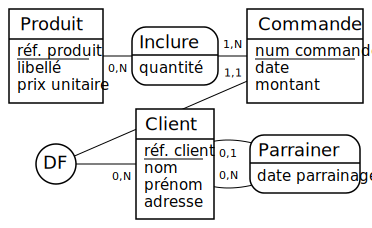

In [32]:
%%mocodo
% Réarrangement des boîtes
% Quand le schéma commence à devenir confus, cliquez sur les deux flèches
% croisées pour réordonner automatiquement les définitions de façon à
% interdire les croisements et minimiser la longueur des pattes. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

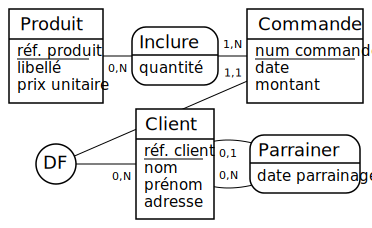

In [33]:
%%mocodo
% Réarrangement avec confinement
% Quand le schéma commence à prendre trop de place, maintenez ALT en cliquant
% sur les deux flèches croisées pour chercher un réarrangement sur la plus
% petite grille équilibrée possible. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

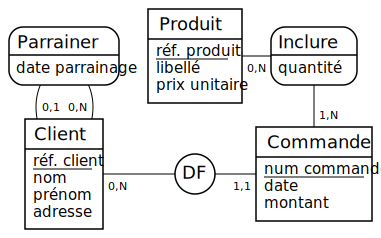

In [34]:
%%mocodo
% Explication des cardinalités
% Si vous insérez quelques mots entre crochets entre les cardinalités et le
% le nom de l'entité, ceux-ci apparaîtront au survol. Essayez en survolant
% les cardinalités de l'association réflexive Parrainer.

Parrainer, 01 [Un client peut avoir été parrainé ou non] Client, 0N [Un client peut parrainer d'autres clients.] Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité

Client: réf. client, nom, prénom, adresse
DF, 0N Client, 11 Commande
Commande: num commande, date, montant

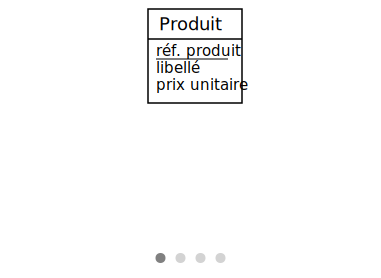

In [35]:
%%mocodo
% Dévoilement progressif du schéma
% Indentez (i.e., insérez des espaces au début de) certaines définitions pour
% créer des calques. Les boîtes définies avec la même indentation sont tracées
% sur le même calque. Les calques sont ordonnés par indentation croissante.

      Parrainer, 01 Client, 0N Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
  Inclure, 1N Commande, 0N Produit: quantité
 
    Client: réf. client, nom, prénom, adresse
    DF, 0N Client, 11 Commande
  Commande: num commande, date, montant

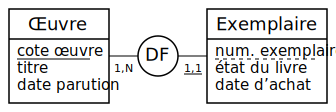

In [36]:
%%mocodo
% Entité faible (ou identification relative)
% Préfixez une cardinalité 11 pour « affaiblir » l'entité distinguée.
%
% NB. De façon non conventionnelle, Mocodo souligne le 11 pour signifier que
% le « renforcement » de l'identifiant va passer par là. Voir la documentation
% pour des représentations alternatives.

Œuvre: cote œuvre, titre, date parution
DF, 1N Œuvre, _11 Exemplaire
Exemplaire: num. exemplaire, état du livre, date d'achat

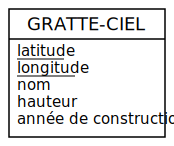

In [37]:
%%mocodo
% Identifiants composites
% Le premier attribut est par défaut souligné (identifiant fort). Préfixez
% d'un _ ceux des suivants que vous voulez inclure dans l'identifiant.

GRATTE-CIEL: latitude, _longitude, nom, hauteur, année de construction

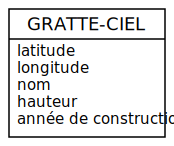

In [38]:
%%mocodo
% Entités sans identifiant
% Inversement, préfixez d'un _ le premier attribut pour ne pas le souligner.

GRATTE-CIEL: _latitude, longitude, nom, hauteur, année de construction

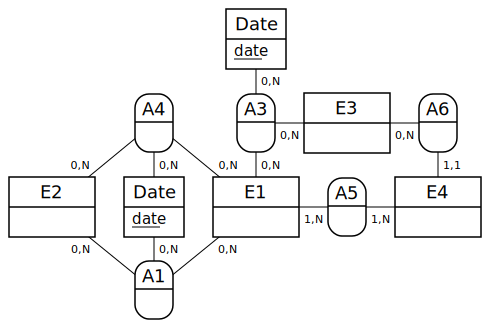

In [39]:
%%mocodo
% Boîtes homonymes / entités vides
% L'éventuel dernier chiffre d'un nom d'entité ou d'association n'est jamais
% affiché. C'est utile, p. ex., pour distribuer une entité DATE trop pattue.
% Notez également la technique de création d'entités vides : leur identifiant
% est une suite d'espaces insécables.

Date1: date

:
A40, 0N E10, 0N E20, 0N Date2
A30, 0N E30, 0N E10, 0N Date1
E30: _         
A60, 11 E40, 0N E30

E20: _         
Date2: date
E10: _         
A50, 1N E40, 1N E10
E40: _         

A10, 0N E10, 0N E20, 0N Date2         
:
:

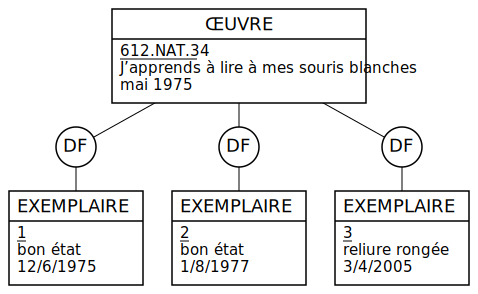

In [40]:
%%mocodo
% Vue en extension
% L'ajout d'un dernier chiffre permet également de créer une vue en extension.

ŒUVRE: 612.NAT.34, J'apprends à lire à mes souris blanches, mai 1975

DF1, XX ŒUVRE, XX EXEMPLAIRE1
DF2, XX ŒUVRE, XX EXEMPLAIRE2
DF3, XX ŒUVRE, XX EXEMPLAIRE3

EXEMPLAIRE1: 1, bon état, 12/6/1975
EXEMPLAIRE2: 2, bon état, 1/8/1977
EXEMPLAIRE3: 3, reliure rongée, 3/4/2005

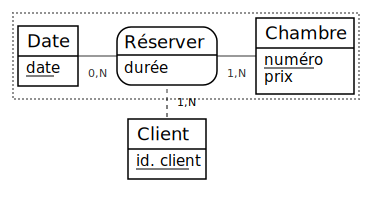

In [41]:
%%mocodo
% Agrégation (ou pseudo-entité)
% Préfixez d'un / une cardinalité pour créer une pseudo-entité avec 
% l'association et les autres entités que celle-ci met en jeu.
%
% NB. La représentation conventionnelle (non prise en charge par Mocodo)
% insérerait une association entre Client et Réserver.

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix

Client: id. client

In [48]:
%%mocodo
% Contrainte d'intégrité fonctionnelle (CIF)
% Le même cas de figure peut aussi être rendu visuellement par une CIF.
%
% NB. Le paragraphe réduit à un deux-points permet d'ajouter une rangée vide à
% la grille sous-jacente, de façon à aérer verticalement le MCD. Les nombres
% représentent des pourcentages de la largeur et de la hauteur totales.

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix

:
    
Client: id. client
    
(CIF) ->Client, --Chambre, --Date, ..Réserver: 20, 75a

Mocodo Err.104 - Malformed constraint ratios "20, 75a".

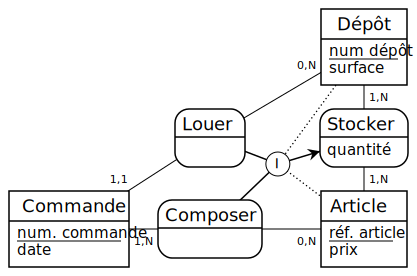

In [47]:
%%mocodo
% Contraintes sur associations
% Ajoutez à votre MCD diverses contraintes sous forme de lettres entourées et
% liées aux boîtes par des traits fléchés ou non, pleins, pointillés, doubles
% ou même invisibles (pour jouer sur la position du barycentre).
%
% Source du MCD : Merise, deuxième génération (Nanci et Espinasse, 2001).

:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
:
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer, Commande, Stocker

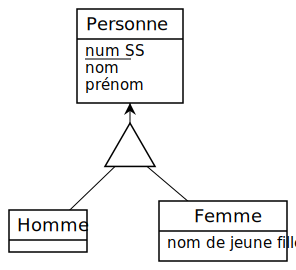

In [44]:
%%mocodo
% Héritage (ou spécialisation)
% Pour spécialiser une entité E en une ou plusieurs autres entités E1, E2, ...
% écrivez « /\ E <- E1, E2, ... ».
%
% NB. Vous pouvez insérer X (exclusion) et/ou T (totalité) entre les barres
% obliques, ajouter une liste d'attributs ou modifier la sémantique et/ou la
% représentation graphique de l'héritage en remplaçant la flèche par <=, ->,
% =>, <<=, <<-, ->> =>>. Voir la documentation.

Personne: num SS, nom, prénom

/\ Personne <- Homme, Femme

Homme: 
:
Femme: nom de jeune fille